In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data=pd.read_excel('glass.xlsx',sheet_name='glass')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [8]:
data.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [13]:
data.duplicated().sum()

np.int64(1)

In [15]:
data[data.duplicated(keep=False)]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [24]:
data.drop_duplicates(inplace=True)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Type    213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.3 KB


<Axes: >

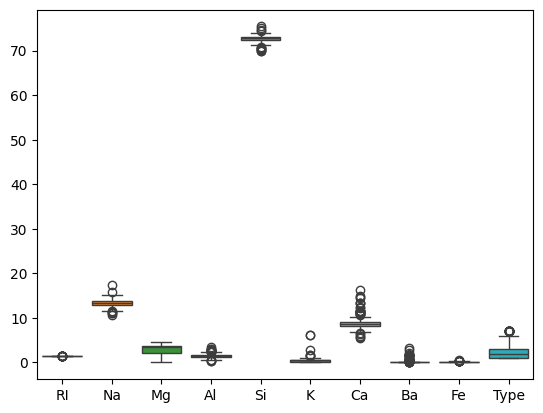

In [28]:
sns.boxplot(data=data)

In [54]:
def  find_outlier(data):
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    iqr=q1-q3
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    out=data[(data<lower_bound) | (data>upper_bound)]
    return out

In [55]:
for n in data.columns:
    oulier=find_outlier(data[n])
    print(len(oulier))
    print(oulier)

213
0      1.52101
1      1.51761
2      1.51618
3      1.51766
4      1.51742
        ...   
209    1.51623
210    1.51685
211    1.52065
212    1.51651
213    1.51711
Name: RI, Length: 213, dtype: float64
213
0      13.64
1      13.89
2      13.53
3      13.21
4      13.27
       ...  
209    14.14
210    14.92
211    14.36
212    14.38
213    14.23
Name: Na, Length: 213, dtype: float64
213
0      4.49
1      3.60
2      3.55
3      3.69
4      3.62
       ... 
209    0.00
210    0.00
211    0.00
212    0.00
213    0.00
Name: Mg, Length: 213, dtype: float64
213
0      1.10
1      1.36
2      1.54
3      1.29
4      1.24
       ... 
209    2.88
210    1.99
211    2.02
212    1.94
213    2.08
Name: Al, Length: 213, dtype: float64
213
0      71.78
1      72.73
2      72.99
3      72.61
4      73.08
       ...  
209    72.61
210    73.06
211    73.42
212    73.61
213    73.36
Name: Si, Length: 213, dtype: float64
213
0      0.06
1      0.48
2      0.39
3      0.57
4      0.55
       ... 

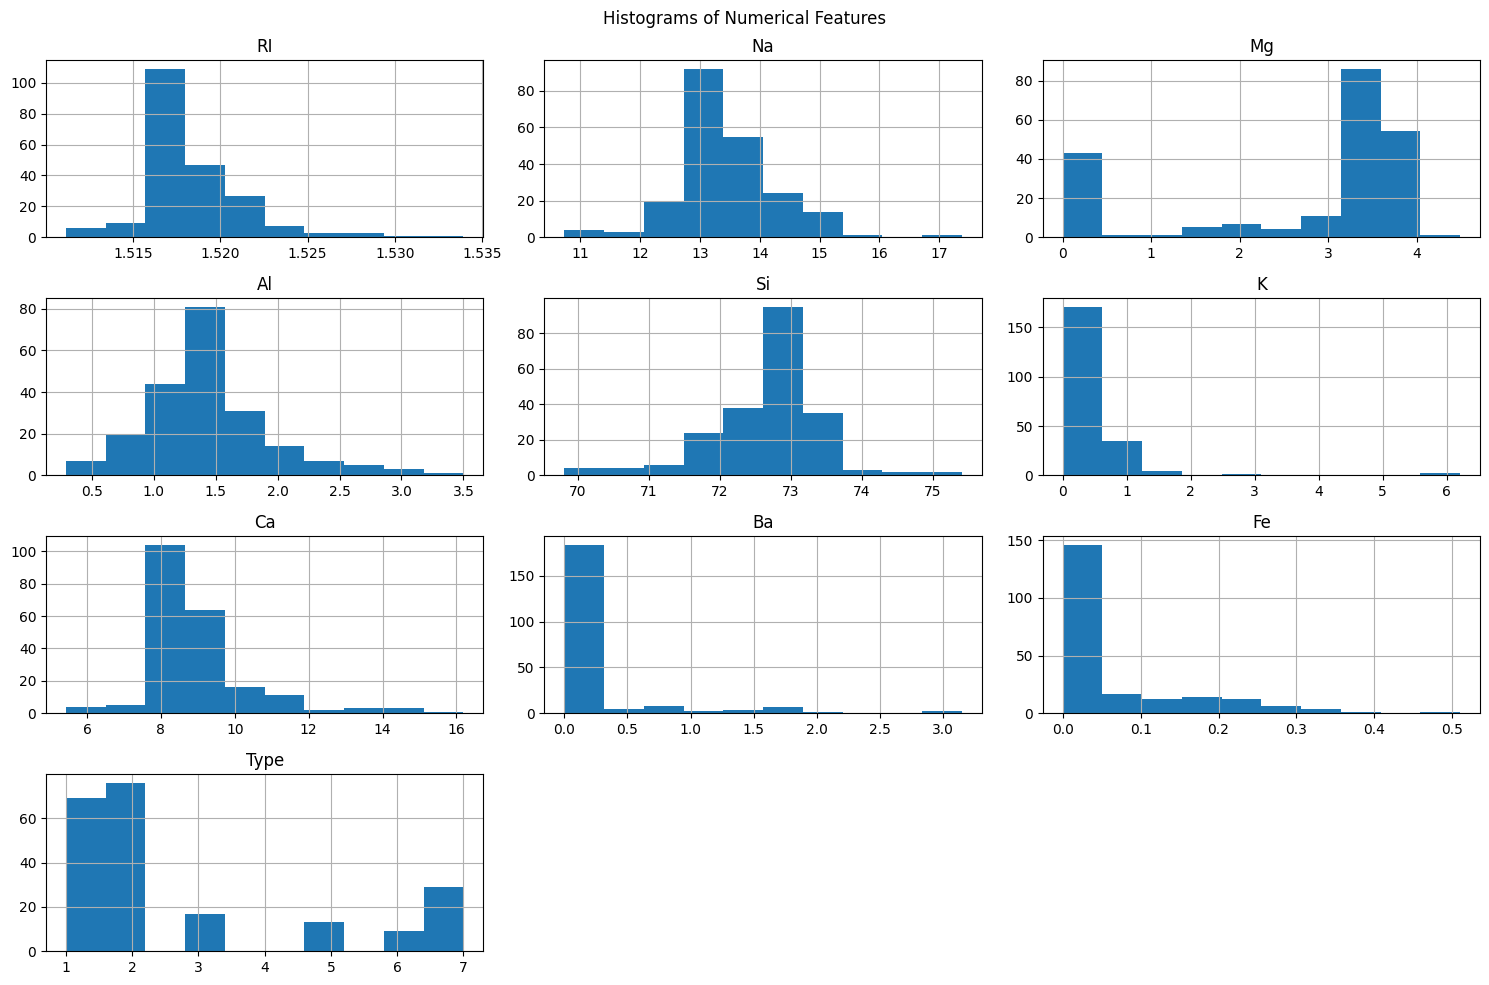

In [56]:
data.hist(figsize=(15,10))
plt.suptitle('Histograms of Numerical Features')
plt.tight_layout()
plt.show()

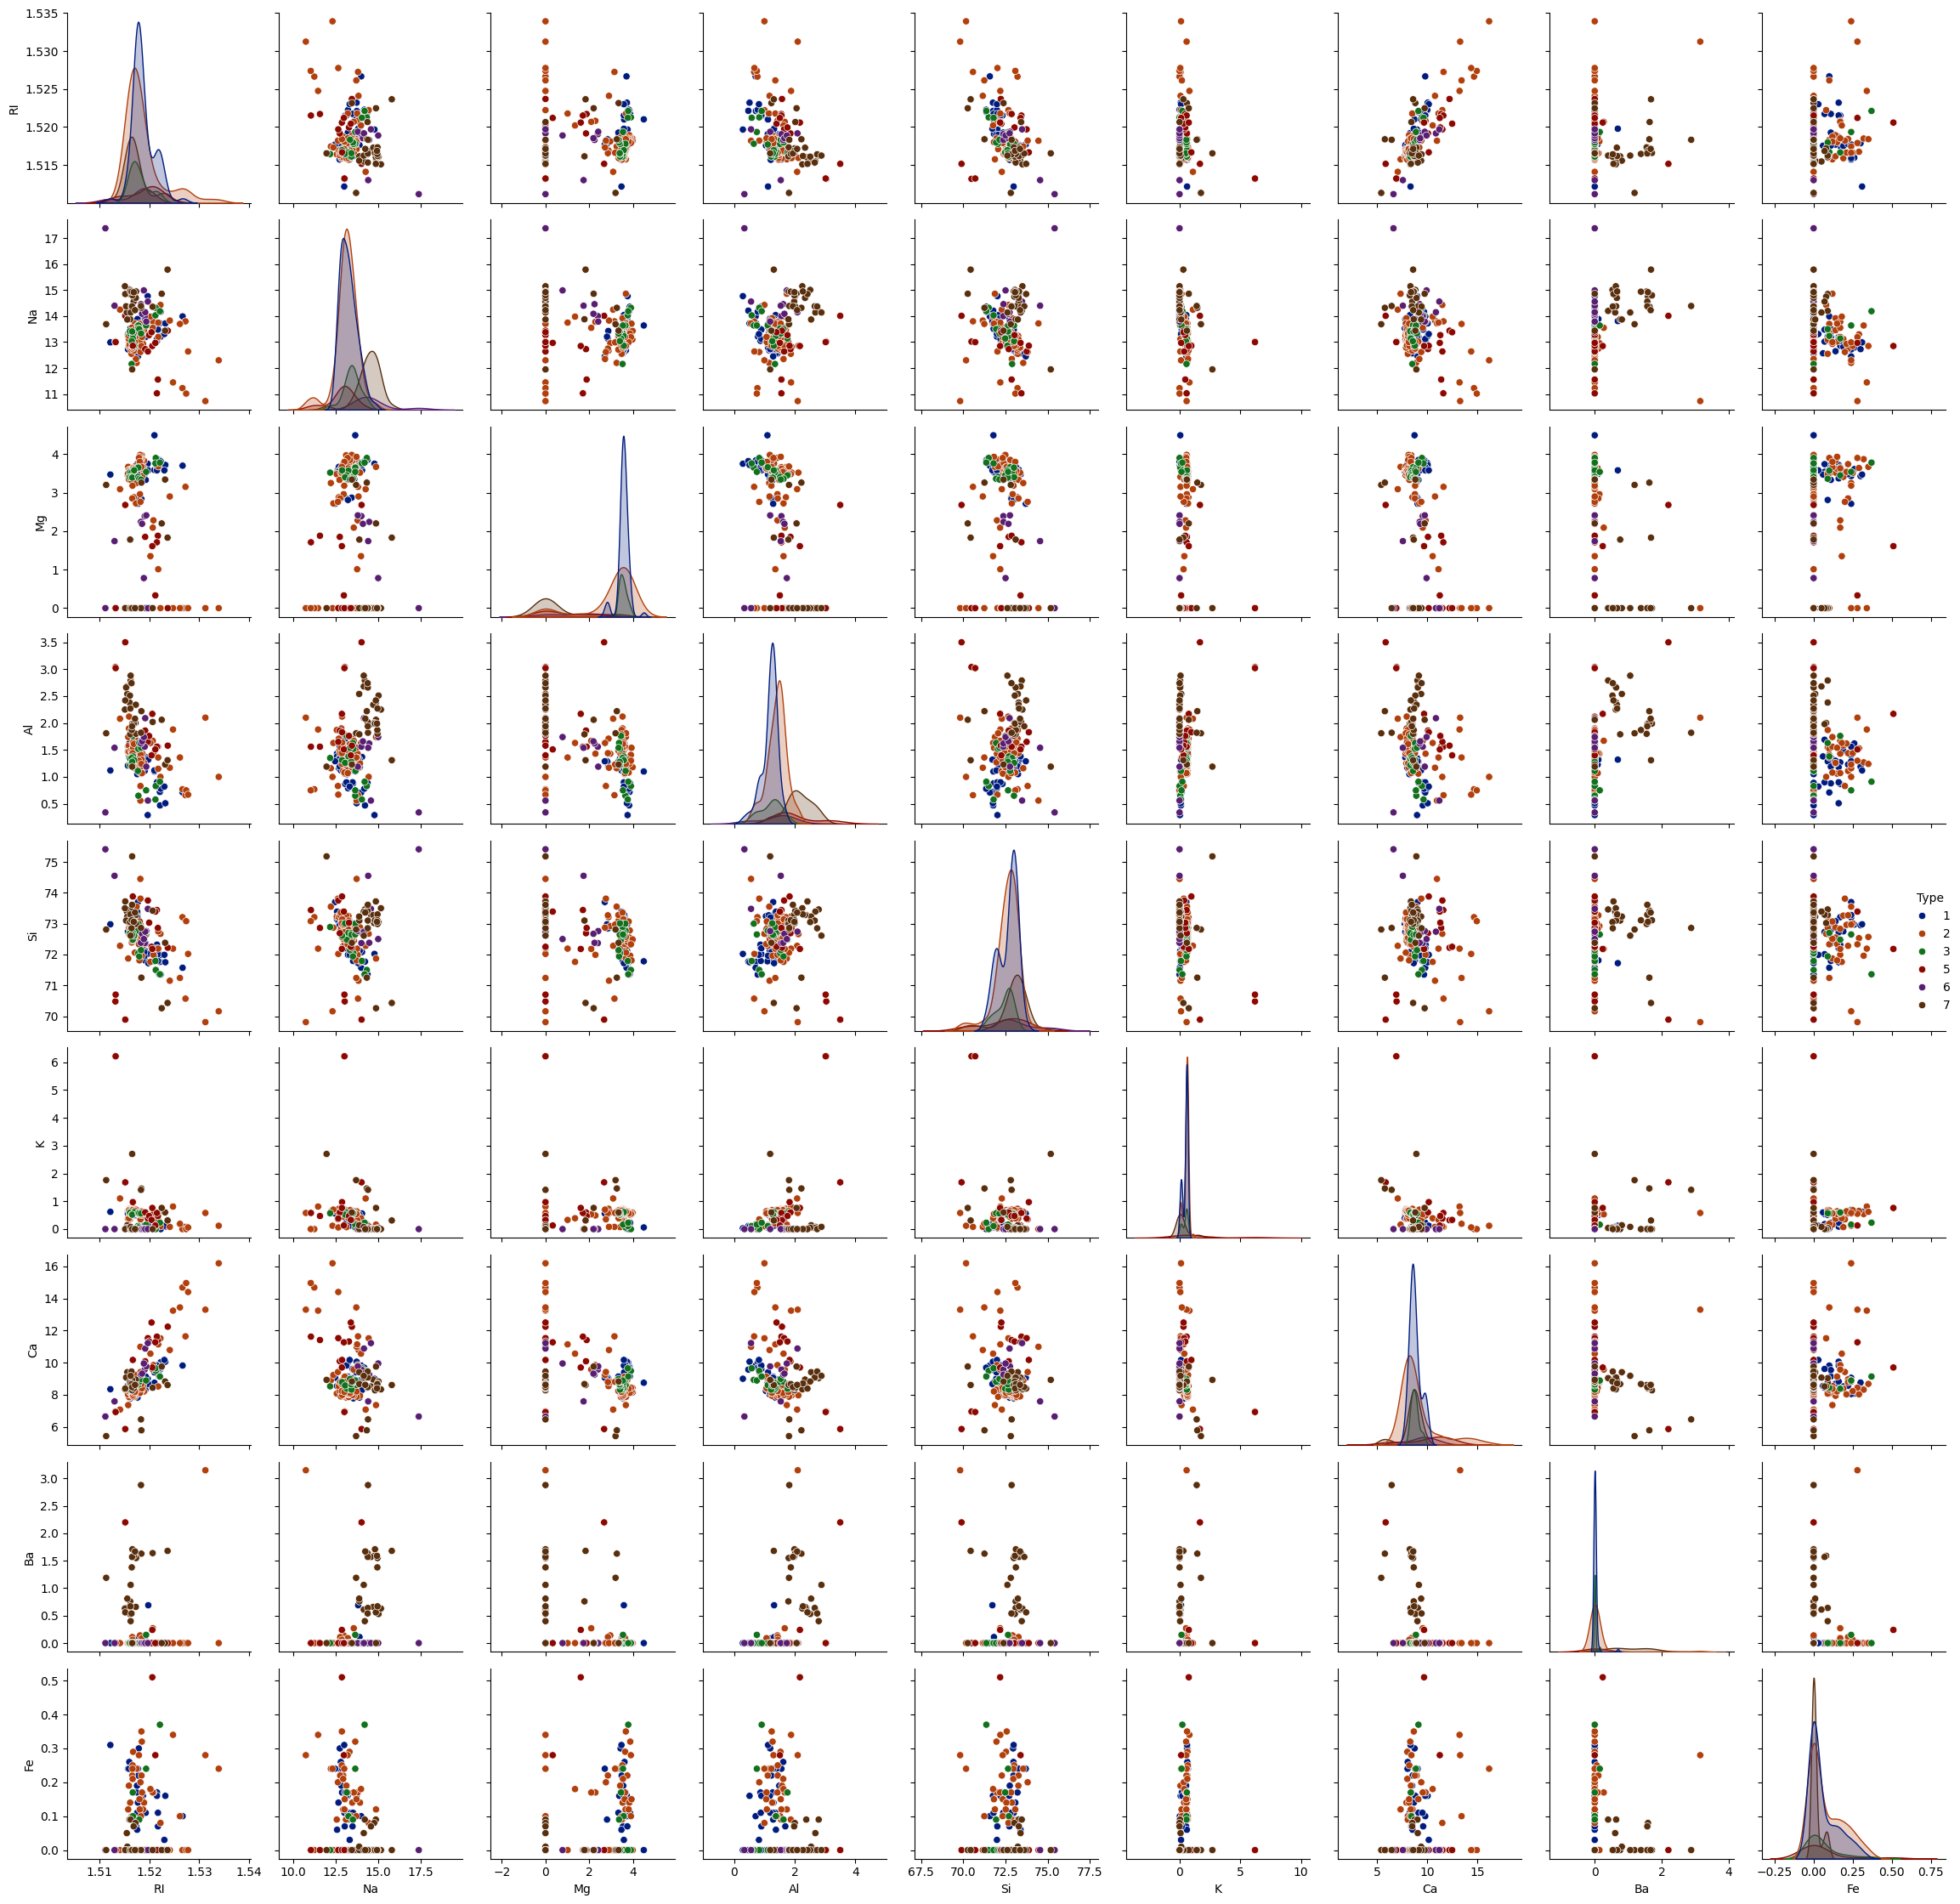

In [58]:
sns.pairplot(data,hue='Type',palette='dark')
plt.tight_layout()
plt.show()

# Data Preprocessing

In [59]:
X = data.drop('Type', axis=1)
y = data['Type']

# Type column id of int datatype and remaining are float

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

In [61]:
std = StandardScaler()
X_scaler = std.fit_transform(X)
X_scaler

array([[ 0.87984017,  0.28955813,  1.25723832, ..., -0.14346582,
        -0.35380764, -0.58830108],
       [-0.24381562,  0.59640332,  0.63931074, ..., -0.79020061,
        -0.35380764, -0.58830108],
       [-0.71641202,  0.15454625,  0.6045957 , ..., -0.82534924,
        -0.35380764, -0.58830108],
       ...,
       [ 0.76086485,  1.17327228, -1.86017161, ..., -0.36138732,
         2.94550057, -0.58830108],
       [-0.60735132,  1.19781989, -1.86017161, ..., -0.33326842,
         2.80467644, -0.58830108],
       [-0.40905912,  1.01371278, -1.86017161, ..., -0.23485225,
         3.00585377, -0.58830108]])

# Handling imbalanced data with SMOTE

In [63]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaler, y)
pd.Series(y_resampled).value_counts()

Type
1    76
2    76
3    76
5    76
6    76
7    76
Name: count, dtype: int64

In [64]:
data_resampled = pd.DataFrame(X_resampled, columns=X.columns)
data_resampled['Type'] = y_resampled
data_resampled

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.673480,-0.143466,-0.353808,-0.588301,1
1,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.028962,-0.790201,-0.353808,-0.588301,1
2,-0.716412,0.154546,0.604596,0.182950,0.433746,-0.167073,-0.825349,-0.353808,-0.588301,1
3,-0.227291,-0.238216,0.701798,-0.322346,-0.058368,0.109149,-0.516041,-0.353808,-0.588301,1
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,0.078457,-0.621487,-0.353808,-0.588301,1
...,...,...,...,...,...,...,...,...,...,...
451,-0.941328,0.754304,-1.860172,2.359921,0.858632,-0.601406,0.188909,1.054213,-0.259398,7
452,-0.495616,1.818448,-1.860172,1.090555,0.552817,-0.765554,-0.381458,2.841073,-0.519703,7
453,-0.719616,-0.910856,-1.860172,0.487350,2.333440,1.921019,0.108193,0.250454,-0.550214,7
454,-0.420645,1.836458,-1.860172,0.835631,0.485209,-0.765554,-0.318705,2.871036,-0.588301,7


# Random forest Model Implementation

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
accuracy_score(y_test, y_pred)

0.9565217391304348

In [66]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           1       0.88      0.88      0.88        17\n           2       1.00      0.89      0.94        19\n           3       0.83      1.00      0.91        10\n           5       1.00      1.00      1.00        14\n           6       1.00      1.00      1.00        14\n           7       1.00      1.00      1.00        18\n\n    accuracy                           0.96        92\n   macro avg       0.95      0.96      0.96        92\nweighted avg       0.96      0.96      0.96        92\n'

In [68]:
precision_score(y_test, y_pred, average='weighted')

np.float64(0.960144927536232)

In [69]:
recall_score(y_test, y_pred, average='weighted')

np.float64(0.9565217391304348)

In [70]:
f1_score(y_test, y_pred, average='weighted')

np.float64(0.9569060166886254)

In [71]:
confusion_matrix(y_test, y_pred)

array([[15,  0,  2,  0,  0,  0],
       [ 2, 17,  0,  0,  0,  0],
       [ 0,  0, 10,  0,  0,  0],
       [ 0,  0,  0, 14,  0,  0],
       [ 0,  0,  0,  0, 14,  0],
       [ 0,  0,  0,  0,  0, 18]])

# Bagging and Boosting Methods

In [72]:
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier

In [74]:
bagging=RandomForestClassifier( n_estimators=100, random_state=42,max_features=3)

In [75]:
bagging.fit(X_train, y_train)

RandomForestClassifier(max_features=3, random_state=42)

In [78]:
y_bag=bagging.predict(X_test)
gradient=GradientBoostingClassifier(random_state=42)
gradient.fit(X_train,y_train)
y_grad=gradient.predict(X_test)

In [79]:
accuracy_score(y_test, y_bag)

0.9456521739130435

In [80]:
precision_score(y_test, y_bag, average='weighted')

np.float64(0.9473128019323671)

In [86]:
recall_score(y_test, y_bag, average='weighted')

np.float64(0.9456521739130435)

In [82]:
f1_score(y_test, y_bag, average='weighted')

np.float64(0.9453762062457713)

In [83]:
accuracy_score(y_test, y_grad)

0.9239130434782609

In [84]:
precision_score(y_test, y_grad, average='weighted')

np.float64(0.9312116778149387)

In [ ]:
recall_score(y_test, y_grad, average='weighted')

In [87]:
f1_score(y_test, y_grad, average='weighted')

np.float64(0.9242856142667106)

# Interview Questions

Explain Bagging and Boosting methods. How is it different from each other?

Bagging:

Bagging is an ensemble learning technique that aims to improve the stability and accuracy of machine learning algorithms by combining the predictions of multiple models. It is primarily used for reducing variance and preventing overfitting.

It reduces overfitting by averaging predictions. Suitable for high-variance models, like decision trees.

Boosting:

Definition: Boosting is another ensemble learning technique that focuses on converting weak learners into strong learners by sequentially training models. It is primarily used for improving accuracy.

It reduces both bias and variance. Often leads to higher accuracy than bagging but is more prone to overfitting if not carefully managed.

Explain how to handle imbalance in the data?

Handling imbalance in the data is crucial in machine learning tasks, especially in classification problems where one class may dominate the dataset. Here are some common techniques to address class imbalance:

Resampling Techniques: Oversampling:

Increase the number of instances in the minority class by randomly duplicating them or generating synthetic samples (e.g., SMOTE - Synthetic Minority Over-sampling Technique).

Undersampling:

Reduce the number of instances in the majority class by randomly removing samples until the class distribution is balanced.

Algorithmic Techniques:

Class Weighting:

Assign higher weights to instances of the minority class during model training to penalize misclassifications more heavily.

Ensemble Methods:

Use ensemble algorithms like Bagging and Boosting with techniques specifically designed to handle class imbalance (e.g., BalancedBaggingClassifier, BalancedRandomForestClassifier).

Cost-sensitive Learning:

Adjust the cost function to reflect the imbalance in class distribution, penalizing misclassifications of the minority class more severely.

Data-level Techniques:

Collect More Data: If possible, collect more data for the minority class to balance the dataset naturally.

Feature Engineering:

Create informative features that help the model distinguish between classes more effectively, reducing the impact of class imbalance.

Choosing the appropriate technique depends on factors such as the severity of class imbalance, dataset size, computational resources, and the specific characteristics of the problem domain.

It's often beneficial to experiment with different approaches to find the most effective solution for a particular dataset.